<a href="https://colab.research.google.com/github/Granero0011/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [28]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data for a visual check
data= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
#header=None, names=['Age','Year','Nodes','Survival'])
print(data)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
5    33  60   0    1
6    34  59   0    2
7    34  66   9    2
8    34  58  30    1
9    34  60   1    1
10   34  61  10    1
11   34  67   7    1
12   34  60   0    1
13   35  64  13    1
14   35  63   0    1
15   36  60   1    1
16   36  69   0    1
17   37  60   0    1
18   37  63   0    1
19   37  58   0    1
20   37  59   6    1
21   37  60  15    1
22   37  63   0    1
23   38  69  21    2
24   38  59   2    1
25   38  60   0    1
26   38  60   0    1
27   38  62   3    1
28   38  64   1    1
29   38  66   0    1
..   ..  ..  ..  ...
275  67  66   0    1
276  67  61   0    1
277  67  65   0    1
278  68  67   0    1
279  68  68   0    1
280  69  67   8    2
281  69  60   0    1
282  69  65   0    1
283  69  66   0    1
284  70  58   0    2
285  70  58   4    2
286  70  66  14    1
287  70  67   0    1
288  70  68   0    1
289  70  59   8    1
290  70  63  

In [29]:
#Let's add some headers here
data= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None, names=['Age','Year','Nodes','Survival'])
data.head()

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
#Let's check if there are some missing values
print(data.isnull().sum())
print('There is no NaN values in the dataframe')

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64
There is no NaN values in the dataframe


In [31]:
#Let's change the encoding
data['Survival']=data['Survival'].replace(2,0)
#Let's print the final result
print(data.head(8))

   Age  Year  Nodes  Survival
0   30    64      1         1
1   30    62      3         1
2   30    65      0         1
3   31    59      2         1
4   31    65      4         1
5   33    58     10         1
6   33    60      0         1
7   34    59      0         0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

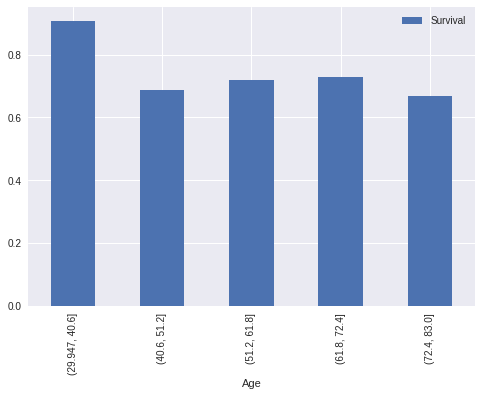

In [48]:
#Let's use age time bins
time_bins = pd.cut(data['Age'], 5)  # 5 equal-sized bins
pd.crosstab(data['Survival'], time_bins)



#plt.hist([data['Age'],data["Survival"]], bins=5 )
#plt.show()
pd.pivot_table(data, values='Survival',
               index=time_bins).plot.bar()


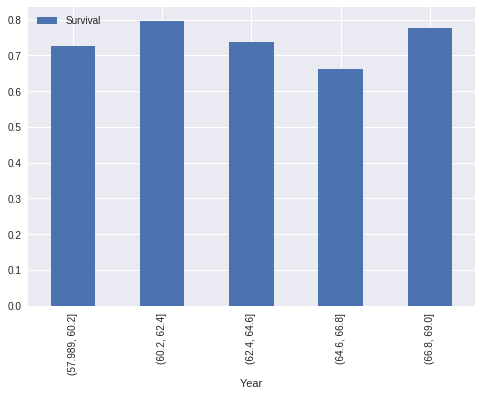

In [49]:
#Let's make time_bins out of years
time_bins = pd.cut(data['Year'], 5)  # 5 equal-sized bins
pd.crosstab(data['Survival'], time_bins)

pd.pivot_table(data, values='Survival',
               index=time_bins).plot.bar()


Age    (29.947, 40.6]  (40.6, 51.2]  (51.2, 61.8]  (61.8, 72.4]  (72.4, 83.0]
Nodes                                                                        
0                  19            40            36            37             4
1                   5            15            15             4             2
2                   4             7             5             3             1
3                   2             6             9             1             2
4                   2             5             5             1             0
5                   1             1             4             0             0
6                   1             4             1             1             0
7                   1             2             4             0             0
8                   0             3             1             3             0
9                   1             1             3             1             0
10                  2             1             0             0 

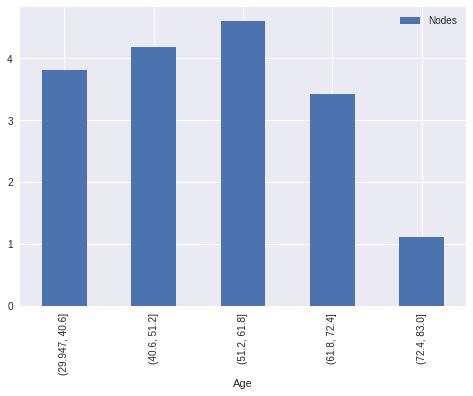

In [53]:

time_bins = pd.cut(data['Age'], 5)  # 5 equal-sized bins
print(pd.crosstab(data['Nodes'], time_bins))


pd.pivot_table(data, values='Nodes',
               index=time_bins).plot.bar()


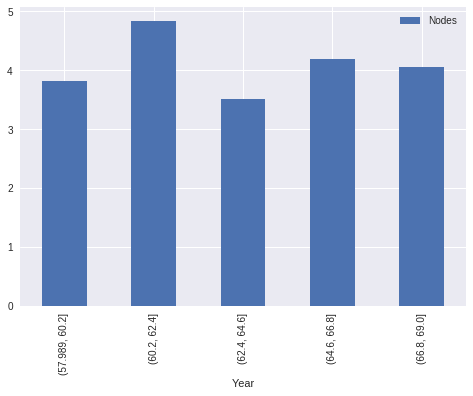

In [52]:
time_bins = pd.cut(data['Year'], 5)  # 5 equal-sized bins
pd.crosstab(data['Nodes'], time_bins)
pd.pivot_table(data, values='Nodes',
               index=time_bins).plot.bar()

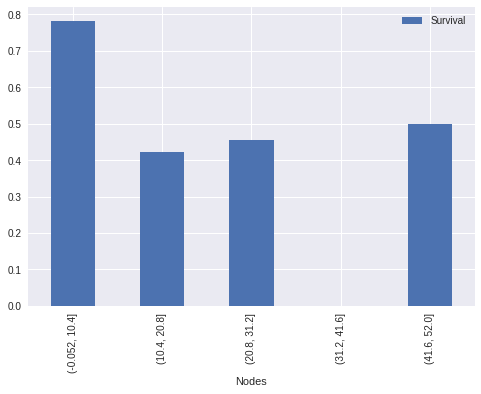

In [54]:
#Let's make time_bins out of years
time_bins = pd.cut(data['Nodes'], 5)  # 5 equal-sized bins
pd.crosstab(data['Survival'], time_bins)

pd.pivot_table(data, values='Survival',
               index=time_bins).plot.bar()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [0]:
#1
#Age seems to be positively correlated with survival. In one of the first graph( age vs survival rate bar graph), we can
#see that trend pretty well.

#2
#The lower the number of nodes, the highest the possibility of survival. We can see that trend by checking on the first bin on 
#the node vs survival bar graph. THe other bars in the graph seem quite close in survival rate, and other variables such as age
# and year of interventions probably have an impact

#3
#Young people have significantly less nodes than the rest of the age category. There is an early negative correlation between age
#and nodes. Very old people seem to have a low number of nodes as well, but I suppose their advanced ages impede their ability to survive
